# Lab 2: More ggplot and dplyr

`YCH` stands for *Your Code Here* Please write your own code for only the places where you see `YCH`.

In [49]:
library(tidyverse)



In [50]:
# randomly sampling a subset from dataset
set.seed(108)
dm = diamonds %>% sample_n(1000)
names(dm)
summary(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

     carat               cut      color      clarity        depth      
 Min.   :0.2300   Fair     : 29   D:109   VS2    :252   Min.   :56.30  
 1st Qu.:0.4000   Good     : 96   E:189   SI1    :250   1st Qu.:61.00  
 Median :0.7000   Very Good:213   F:171   SI2    :153   Median :61.80  
 Mean   :0.7968   Premium  :256   G:216   VS1    :146   Mean   :61.73  
 3rd Qu.:1.0400   Ideal    :406   H:143   VVS2   : 98   3rd Qu.:62.50  
 Max.   :3.2200                   I:116   VVS1   : 60   Max.   :67.30  
                                  J: 56   (Other): 41                  
     table           price               x               y       
 Min.   :44.00   Min.   :  334.0   Min.   :3.850   Min.   :3.91  
 1st Qu.:56.00   1st Qu.:  971.8   1st Qu.:4.728   1st Qu.:4.72  
 Median :57.00   Median : 2398.5   Median :5.715   Median :5.72  
 Mean   :57.44   Mean   : 3941.8   Mean   :5.729   Mean   :5.73  
 3rd Qu.:59.00   3rd Qu.: 5493.0   3rd Qu.:6.522   3rd Qu.:6.51  
 Max.   :67.00   Max.   :187

# ggplot

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph1.png)

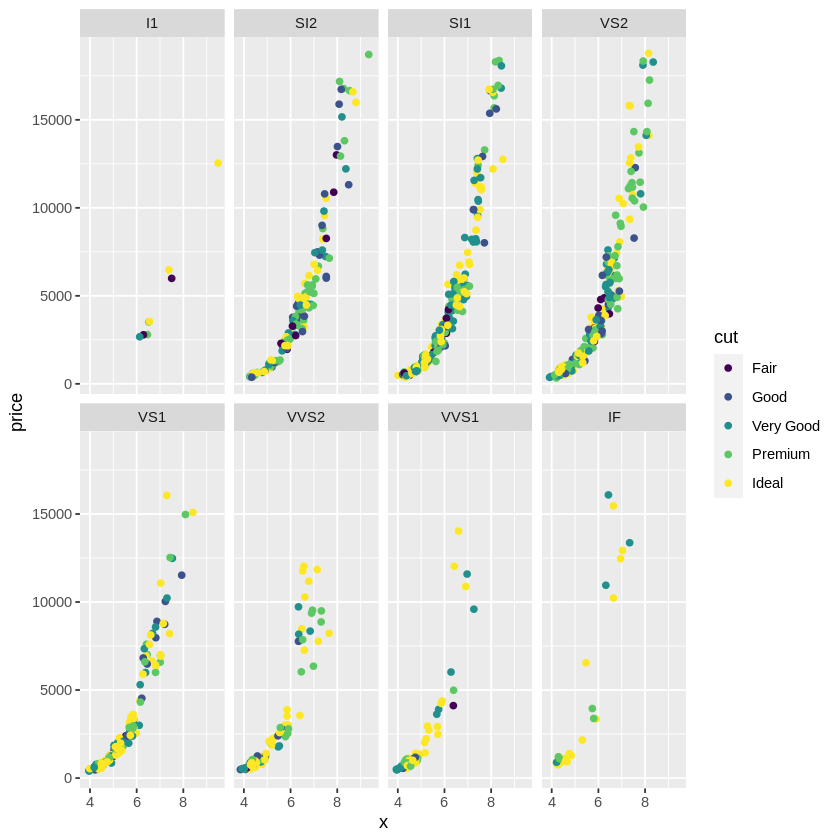

In [51]:
p1 = ggplot(dm) + 
    geom_point(aes(x, price, color = cut)) + 
    facet_wrap(vars(clarity), ncol=4)
print(p1)

## Geometric objects
So far we have plotted the points in a fundamental manner. We might be interested in trends of the data that we have.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



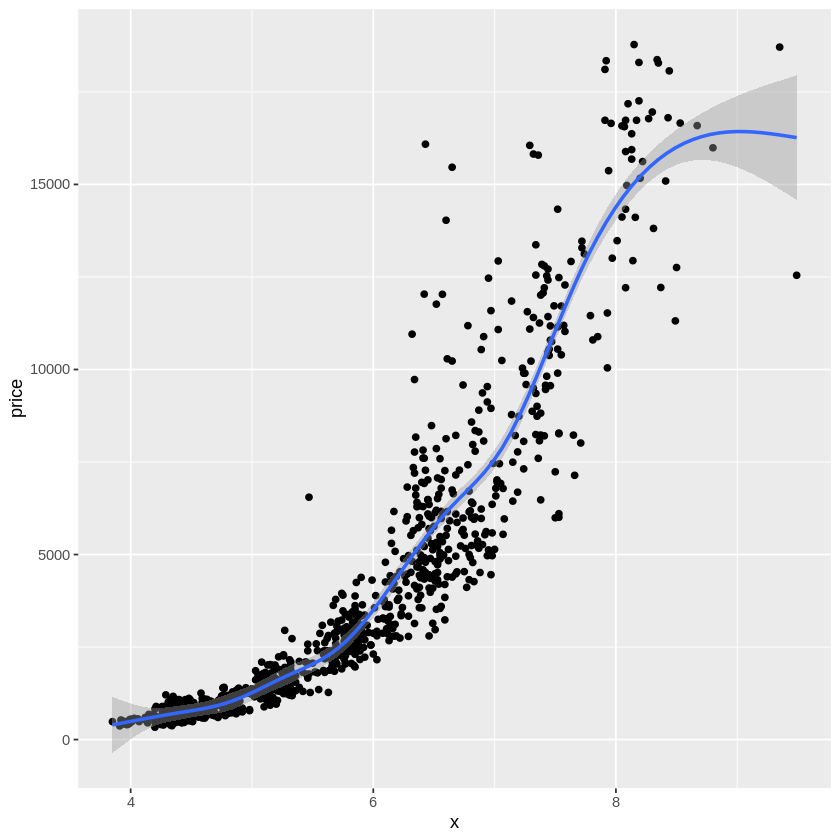

In [52]:
p2 = ggplot(dm) +
    geom_point(aes(x, price)) +
    geom_smooth(aes(x, price))
print(p2)

### Exercise 1
In the above fit, use locally weighted scatterplot smoother instead general additive model (loess). (see documentation)

`geom_smooth()` using formula 'y ~ x'



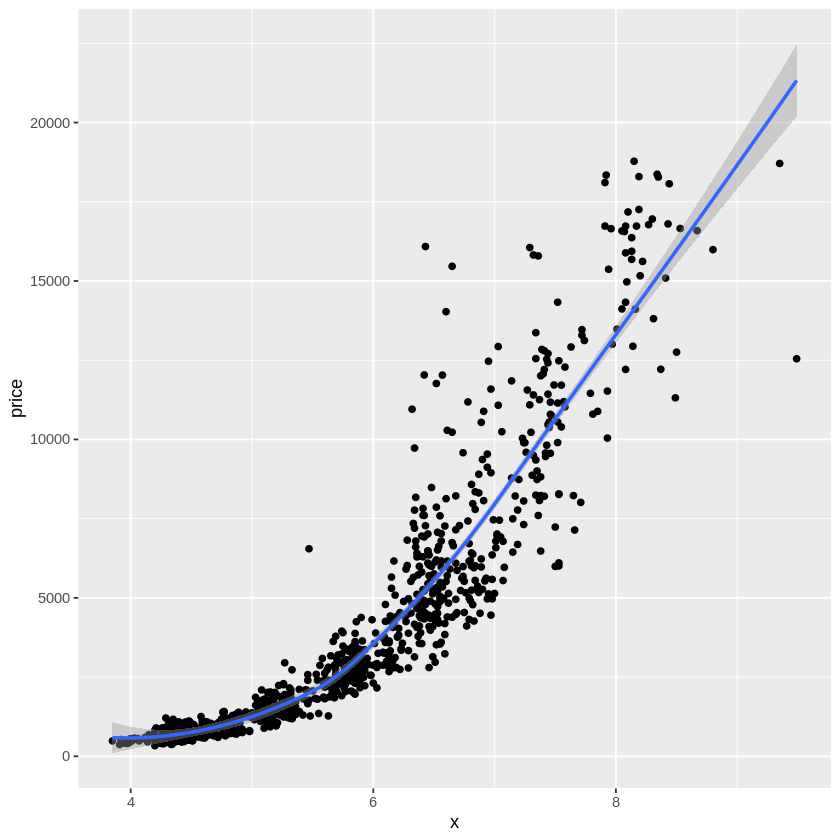

In [53]:
p3 = ggplot(dm) + 
    geom_point(aes(x, price)) + 
    geom_smooth(aes(x, price), method = "loess")
p3

### Exercise 2.1 
Fit a linear line

`geom_smooth()` using formula 'y ~ x'



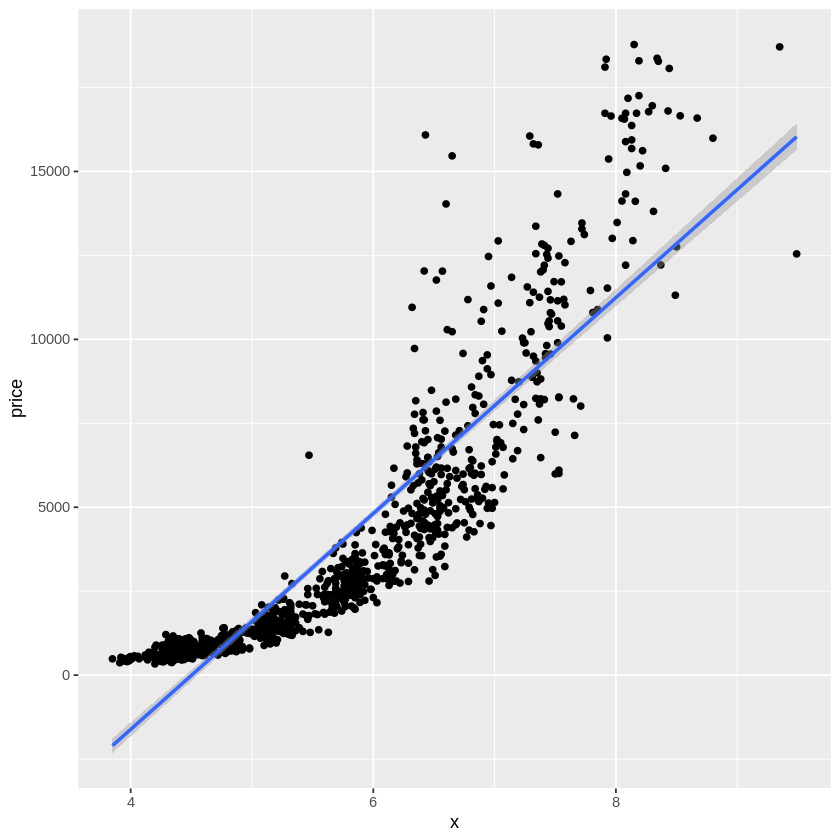

In [54]:
p4 = ggplot(dm) + 
    geom_point(aes(x, price)) + 
    geom_smooth(aes(x, price), method = "lm")
p4

### Exercise 2.2 (You do not need to do anything if your previous code is correct)
Fit a linear line in log scale

`geom_smooth()` using formula 'y ~ x'



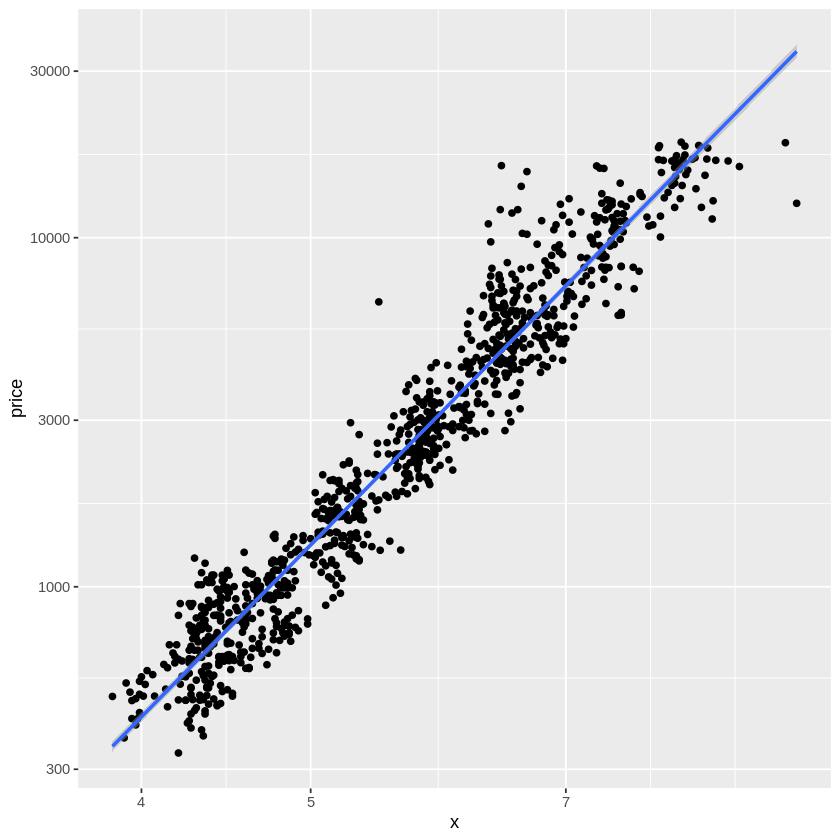

In [55]:
p4 + scale_x_continuous(trans='log10') + 
     scale_y_continuous(trans='log10')

### Why would log-log plot make sense?
* log-log plot describes the relationship $Price = c \cdot Carat^k$ for some constant $c, k > 0$. You could imagine that going from 0.1 carat to 0.2 carat may not increase much value, but increasing 1.9 carats to 2.0 carats would result in a significant increase in price. Let's look at the following relationship
$$ Price = c \cdot Carat^k \Rightarrow \log Price = \log c + k \log x$$
* You can see that once we transform both variables with log, we have a linear relationship between $\log Price$ and $\log Carat$.
* Can we find a transformation for all non-linear functions that turns it to a linear function? 

### Exercise 2.3
Make separate linear lines for each category of the clarity variable 

`geom_smooth()` using formula 'y ~ x'



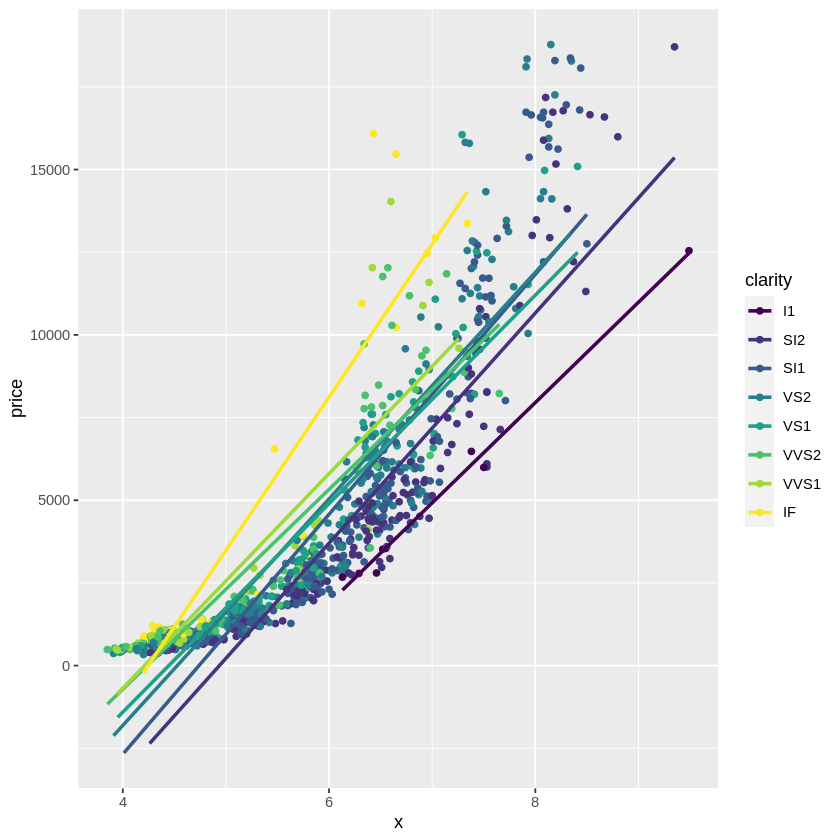

In [56]:
p4 = ggplot(dm) + 
    geom_point(aes(x = x, y = price, color = clarity)) + 
    geom_smooth(aes(x, price, color = clarity), method = "lm", se = F)
p4

### Exercise 3
How to reduce the code duplication above? "(x=x, y=price)" is in both lines. 

`geom_smooth()` using formula 'y ~ x'



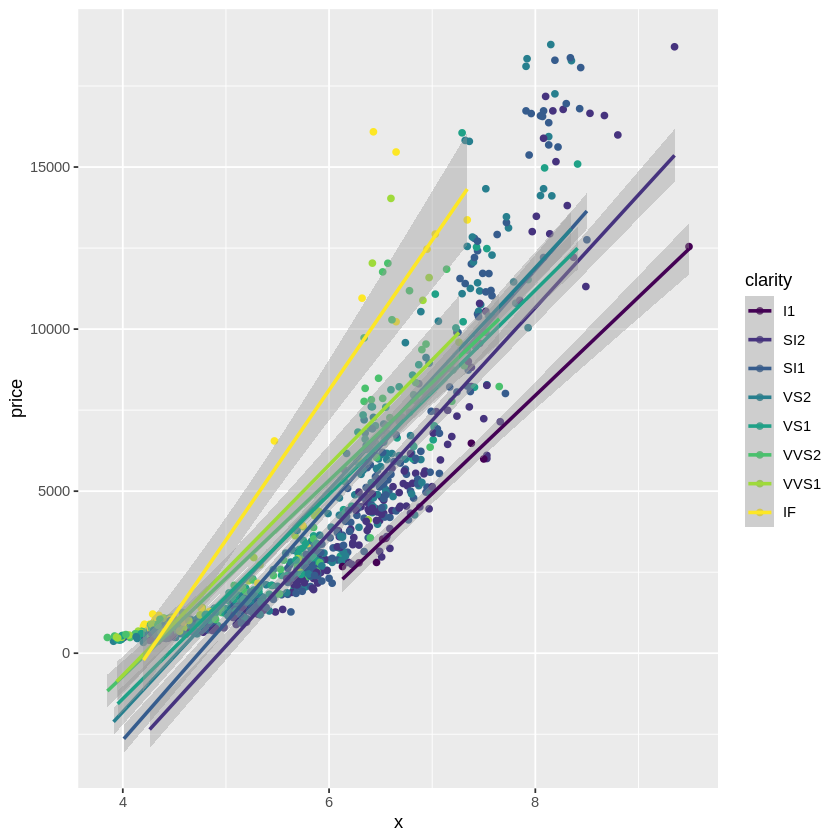

In [57]:
p5 = ggplot(dm, aes(x, price, color = clarity)) + 
    geom_point() + 
    geom_smooth(method = "lm")
p5

### Some other parameters

`geom_smooth()` using formula 'y ~ x'



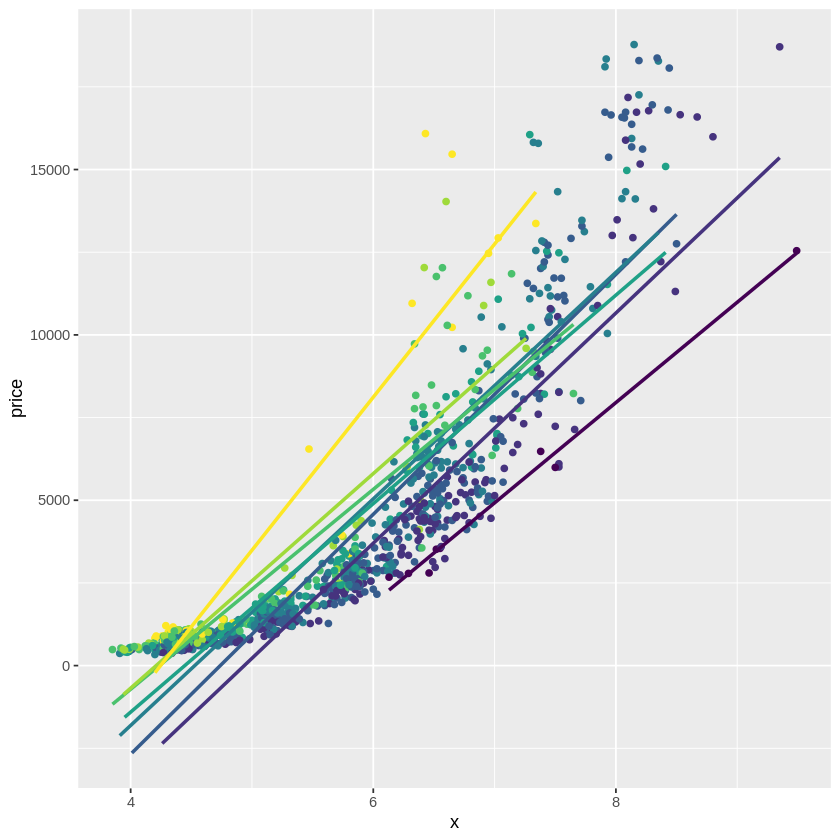

In [58]:
p6 = ggplot(dm, aes(x, price, color = clarity)) + 
    geom_point(show.legend=FALSE ) + 
    geom_smooth(method = "lm", se = F, show.legend=FALSE ) #+ theme(legend.position = "none")
p6

1. What does show.legend=FALSE do? 
    Avoid showing Legends
2. What does the se argument in geom_smooth do?
    Control whether to show confidence region of the fitted curve.

### Homework (You don't need to turn it in)
1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?
2. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predicions.


In [59]:
# Boxplot

# Histogram

# Area Chart

## Statistical transformations
Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot.

You can learn which stat a geom uses by inspecting the default value for the 'stat' argument. For example, ?geom_bar shows that the default value for stat is 'count', which means that geom_bar() uses stat_count().

stat_count() is documented on the same page as geom_bar(), and if you scroll down you can find a section called "computed variables." That describes how it computes two new variables: count and prop.

Let's use the following case where we override the default stat and instead want to use a value within the dataset of the y-axis (instead of a count).


In [60]:
?geom_bar

In [61]:
popn <- tribble(
~city, ~population,
"Istanbul", 15029231,
"Moscow", 12615279,
"Saint Petersburg", 9126366,
"Berlin", 5383890,
"Madrid", 3748148
)

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph5.png)

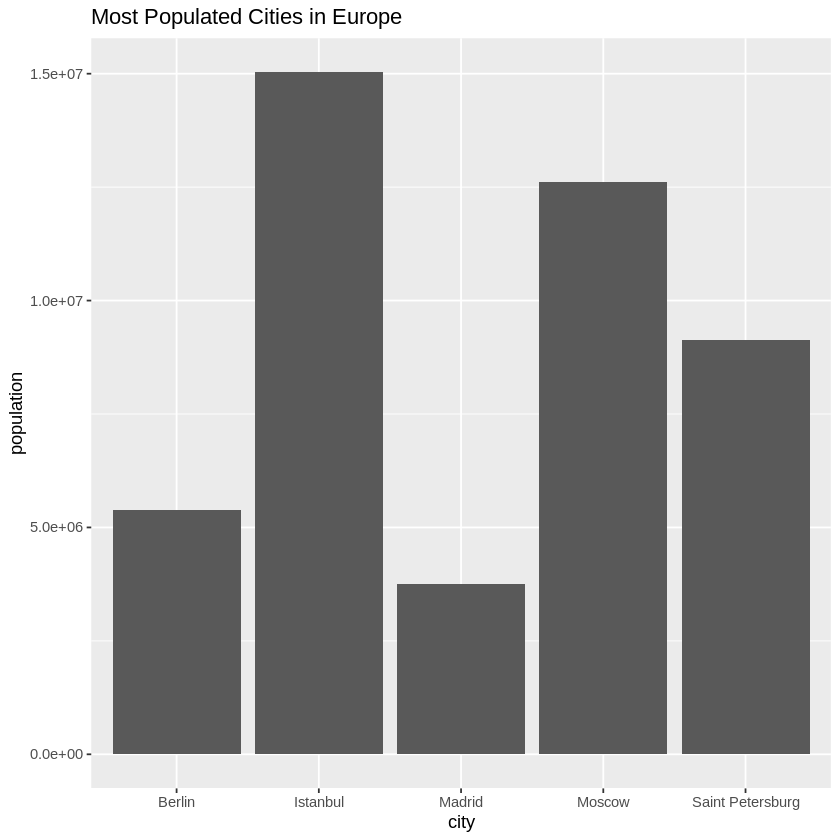

In [62]:
ggplot(data = popn, aes(city, population)) + 
    geom_col() + ggtitle("Most Populated Cities in Europe")

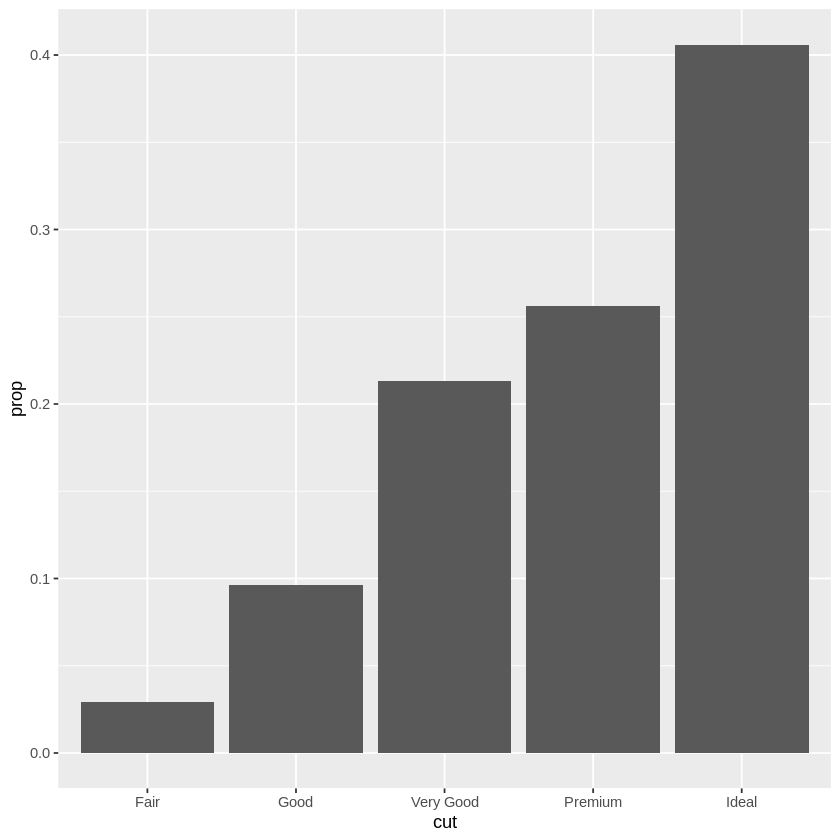

In [63]:
ggplot(data = dm) + 
    geom_bar(mapping = aes(x=cut, y=..prop.., group  = 1))

Other times, you want to draw greater attention to the statistical transformation in your code. For example, you might use stat_summary() which summarises the y values for each unique x value, to draw attention to the summary that you're computing:

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph6.png)

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


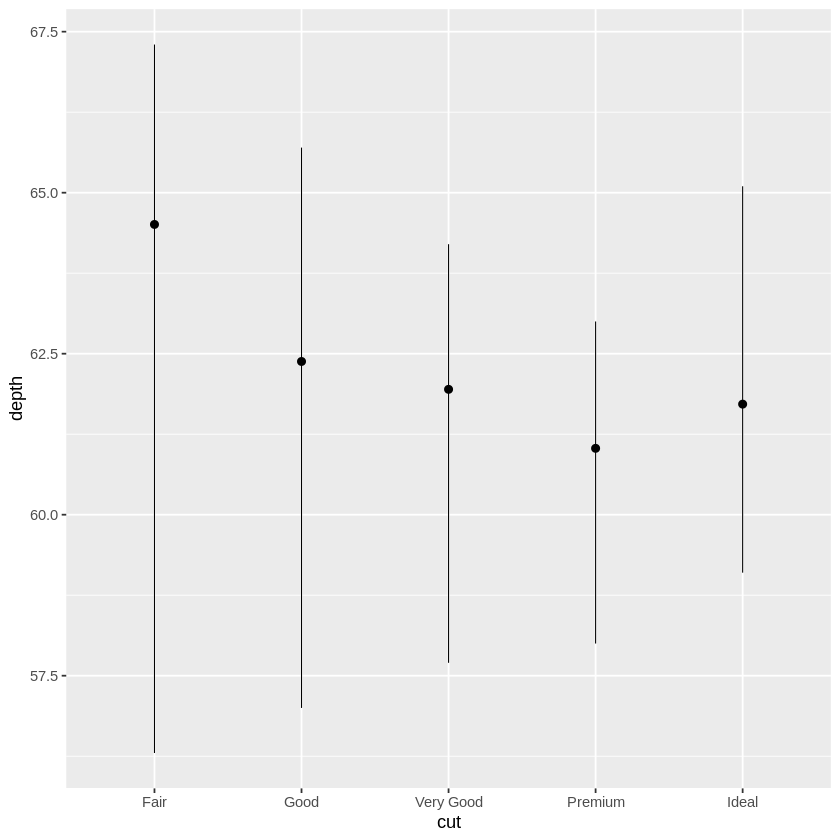

In [64]:
ggplot(data = dm, aes(cut, depth)) + 
    stat_summary(fun.y = mean, fun.ymin = min, fun.ymax = max, size = .3)

### Homework (You don't need to turn it in)
1. What is the default geom associated with stat_summary()? How could you rewrite the previous plot to use that geom function instead of the stat function?
2. What does geom_col() do? How is it different to geom_bar()?
3. Most geoms and stats come in pairs that are almost always used in concert. Read through the documentation and make a list of all the pairs. What do they have in common?
4. What variables does stat_smooth() compute? What parameters control its behaviour?
6. In our proportion bar chart, we need to set group = 1. Why?

## Position adjustments

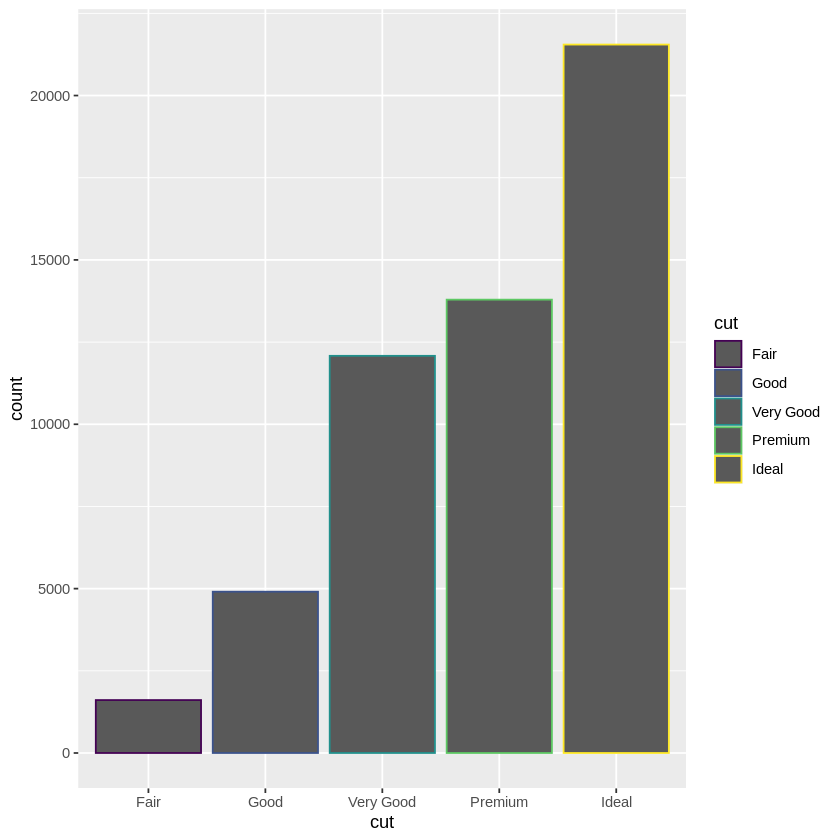

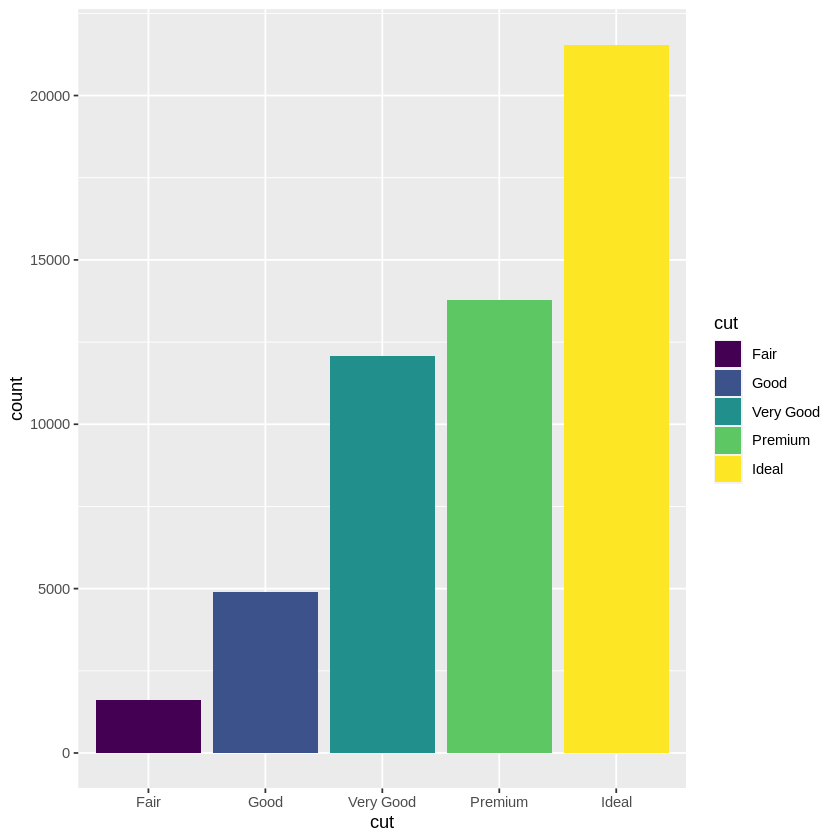

In [65]:
# Difference between color and fill
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph7.png)

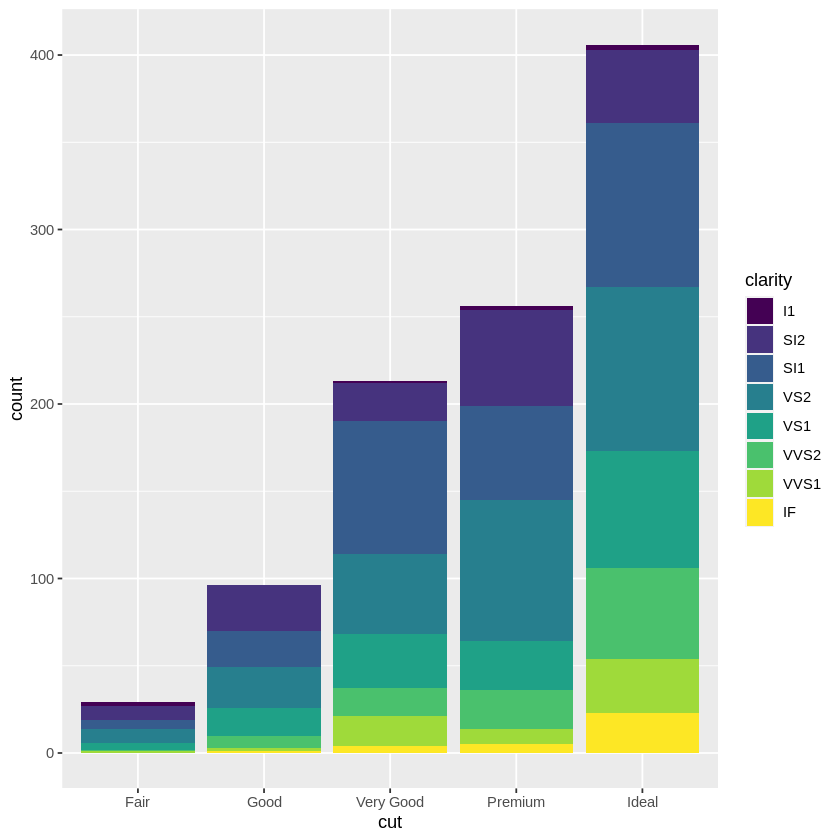

In [66]:
ggplot(data = dm, aes(x = cut)) + 
  geom_bar(aes(fill = clarity))

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

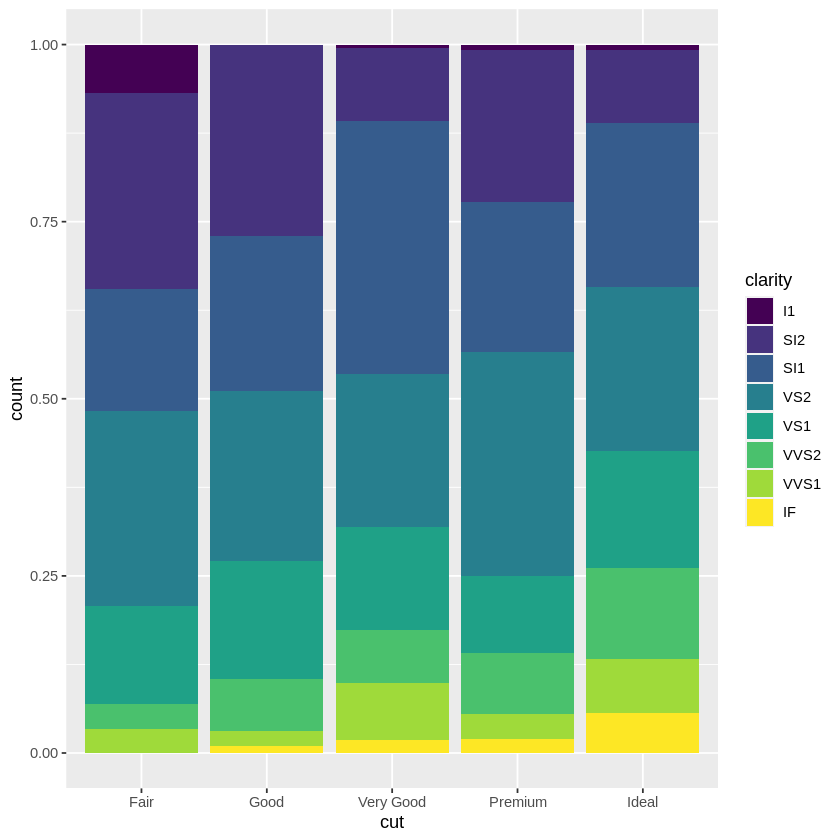

In [67]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

![Caption for the picture.](https://raw.githubusercontent.com/enesdilber/stats306_labs/master/lab2/graph10.png)

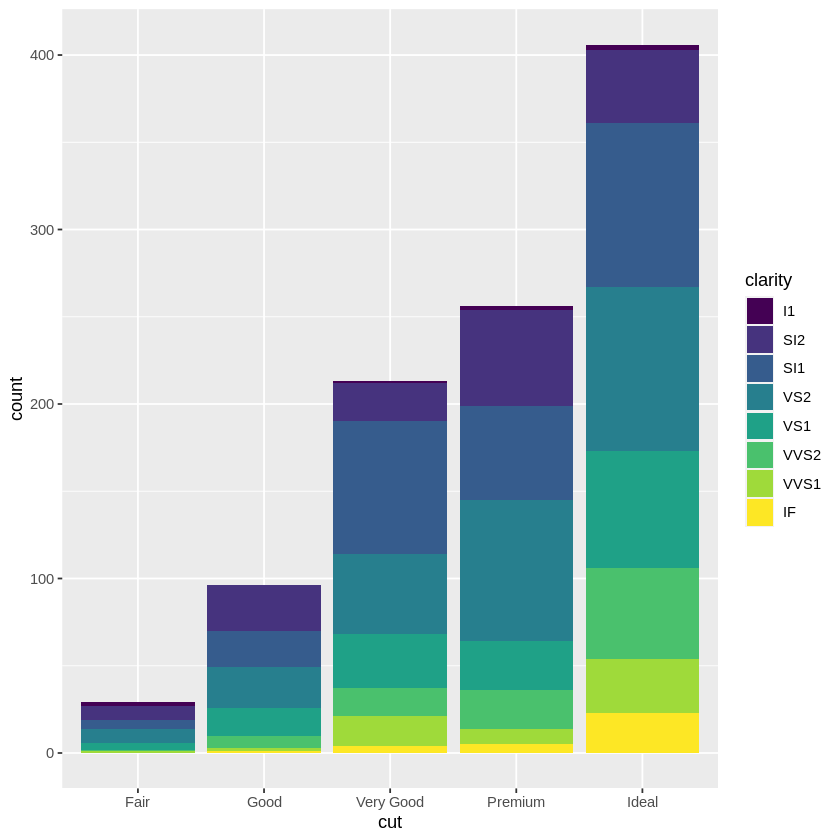

In [68]:
ggplot(data = dm, aes(x = cut)) + 
  geom_bar(aes(fill = clarity))

A positional adjustment that is very useful for scatterplots with overlaps is the 'jitter' argument.

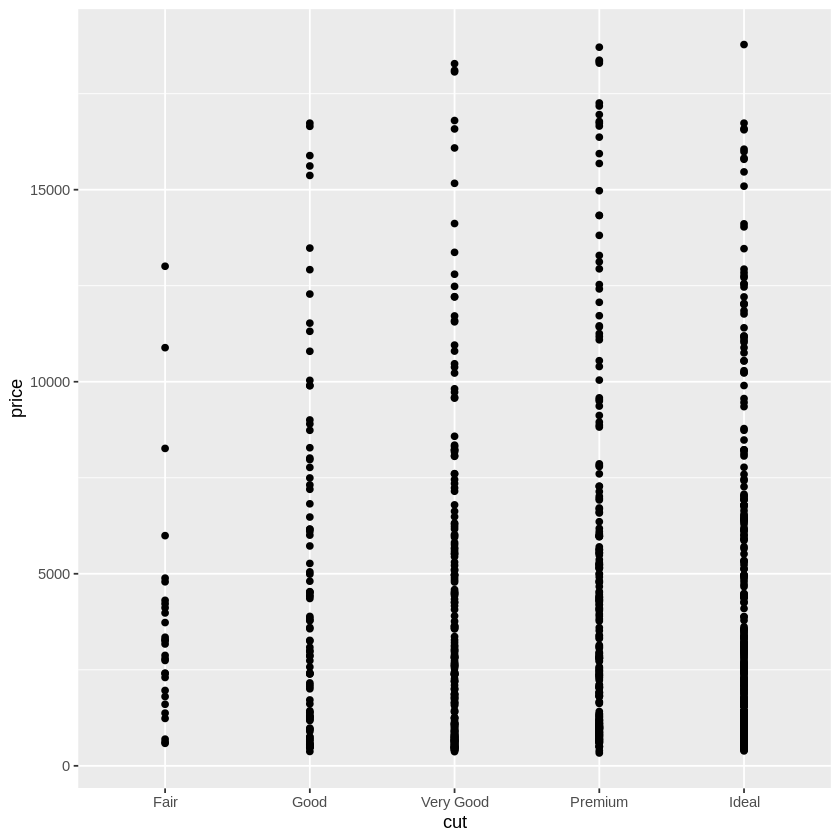

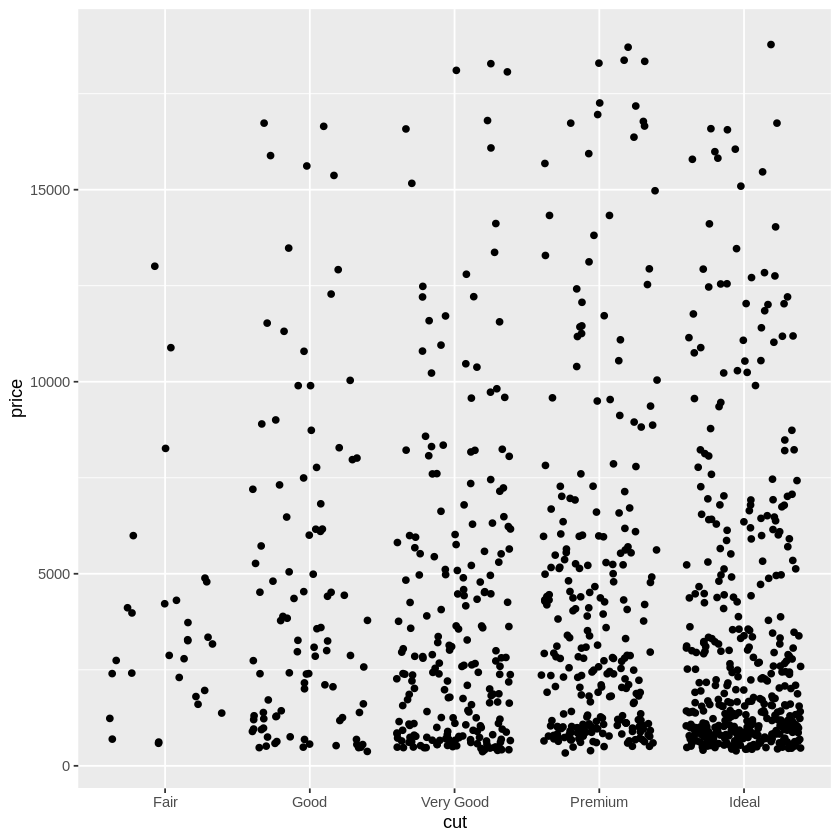

In [69]:
ggplot(data = dm) + 
  geom_point(mapping = aes(x = cut, y = price))

ggplot(data = dm) + 
  geom_point(mapping = aes(x = cut, y = price), position = "jitter")

### Homework (You don't need to turn it in)
1. What parameters to geom_jitter() control the amount of jittering?
2. Compare and contrast geom_jitter() with geom_count().
3. What's the default position adjustment from geom_boxplot()? Create a visualization of the mpg dataset and demostrate it. 
Make sure you go through coordinate systems.

# dplyr for data manipulation

In [70]:
dim(dm)
head(dm)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.52,Ideal,F,VS1,62.2,55,16055,7.29,7.41,4.57
0.56,Ideal,H,VS2,61.7,54,1427,5.31,5.33,3.28
0.88,Very Good,I,VS1,63.3,55,2996,6.11,6.06,3.85
1.01,Ideal,G,VS2,59.8,61,6132,6.51,6.54,3.90
0.45,Ideal,I,VS2,61.3,55,748,4.92,4.96,3.03
1.36,Ideal,G,VVS2,61.1,57,11848,7.14,7.20,4.38


Simply run 'dm' after declaring the dm variable above. can you guess what 'dbl', 'ord', and 'int' are?

Notice how the levels below follow an order. Indeed, we expect Fair < Good < Very Good < Premium < Ideal

In [71]:
print(levels(dm$cut))
print(levels(dm$color))
print(levels(dm$clarity))

[1] "Fair"      "Good"      "Very Good" "Premium"   "Ideal"    
[1] "D" "E" "F" "G" "H" "I" "J"
[1] "I1"   "SI2"  "SI1"  "VS2"  "VS1"  "VVS2" "VVS1" "IF"  


In [72]:
sizes = c("M", "S", "S", "M", "XL", "XXL", "XL", "S", "M", "L")
levels(as.factor(sizes))

[1] "L"   "M"   "S"   "XL"  "XXL"

In [73]:
sizes = ordered(sizes, levels = c("S", "M", "L", "XL", "XXL"))
levels(sizes)

[1] "S"   "M"   "L"   "XL"  "XXL"

There are five functions in dplyr: filter, arrange, select, mutate and summarise. all of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [74]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.08,Fair,J,VS2,65.1,54,3980,6.47,6.44,4.2


Usually you want to store the newly subsetted data in memory. 

In [75]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [76]:
4 == 6
test = 6
test
test == 5


[1] FALSE

[1] 6

[1] FALSE

## Use cases

In [77]:
levels(dm$cut)[length(levels(dm$cut))]

[1] "Ideal"

In [78]:
a = filter(dm, color == 'D' | cut == 'Fair') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, color == 'D' & cut == 'Fair') 
# filtering for rows that satisfy both conditions

c = filter(dm, xor(color == 'D',cut == 'Fair')) 
# filtering for rows that satisfy exactly one condition

best_cuts = filter(dm, cut == 'Ideal')#levels(cut)[length(levels(cut))]) 
# filtering using membership condition

not_worst_cuts = filter(dm, cut != "Fair")#levels(cut)[1]) 
# can do this because cut is an ordinal variable

In [79]:
not_worst_cuts[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.52,Ideal,F,VS1,62.2,55.0,16055,7.29,7.41,4.57
0.56,Ideal,H,VS2,61.7,54.0,1427,5.31,5.33,3.28
0.88,Very Good,I,VS1,63.3,55.0,2996,6.11,6.06,3.85
1.01,Ideal,G,VS2,59.8,61.0,6132,6.51,6.54,3.90
0.45,Ideal,I,VS2,61.3,55.0,748,4.92,4.96,3.03
1.36,Ideal,G,VVS2,61.1,57.0,11848,7.14,7.20,4.38
0.72,Ideal,D,SI2,61.1,58.0,2514,5.76,5.79,3.53
0.31,Ideal,E,VS1,61.8,55.0,692,4.36,4.38,2.70
1.53,Very Good,H,SI1,61.1,57.0,10468,7.44,7.45,4.55


In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [80]:
x = 4
x == NA
is.na(x)

[1] NA

[1] FALSE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [81]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 x 1
      x
  <dbl>
1     1
2    NA
3     3


In [82]:
filter(df, x>1)

x
<dbl>
3


In [83]:
filter(df, is.na(x) | x > 1)

x
<dbl>
NA
3


### Homework (Don't need to turn it in)
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that wil allow you to output diamonds with even-numbered prices

## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [84]:
arrange(dm, clarity, color)[1:20,] 

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.92,Very Good,D,I1,63.0,58,2674,6.13,6.18,3.88
1.02,Premium,E,I1,60.4,62,3519,6.52,6.47,3.92
1.01,Fair,E,I1,64.5,58,2788,6.29,6.21,4.03
1.06,Ideal,F,I1,61.8,55,3544,6.55,6.58,4.06
1.04,Premium,G,I1,62.2,58,2801,6.46,6.41,4.00
1.53,Ideal,H,I1,62.3,56,6477,7.38,7.34,4.59
1.82,Fair,H,I1,67.3,58,5993,7.50,7.47,5.04
3.22,Ideal,I,I1,62.6,55,12545,9.49,9.42,5.92
0.72,Ideal,D,SI2,61.1,58,2514,5.76,5.79,3.53


Missing values are always sorted at the end:

In [85]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
<dbl>
2
5
NA


In [86]:
arrange(df, desc(x))

x
<dbl>
5
2
NA


### Exercise
1. Use arrange to sort the dm dataset by describing order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.

## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [87]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [88]:
select(dm, carat, price)[1:20,]

carat,price
<dbl>,<int>
1.52,16055
0.56,1427
0.88,2996
1.01,6132
0.45,748
1.36,11848
0.72,2514
0.31,692
1.53,10468


In [89]:
select(dm, carat:price)[1:20,]

carat,cut,color,clarity,depth,table,price
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>
1.52,Ideal,F,VS1,62.2,55.0,16055
0.56,Ideal,H,VS2,61.7,54.0,1427
0.88,Very Good,I,VS1,63.3,55.0,2996
1.01,Ideal,G,VS2,59.8,61.0,6132
0.45,Ideal,I,VS2,61.3,55.0,748
1.36,Ideal,G,VVS2,61.1,57.0,11848
0.72,Ideal,D,SI2,61.1,58.0,2514
0.31,Ideal,E,VS1,61.8,55.0,692
1.53,Very Good,H,SI1,61.1,57.0,10468


In [90]:
select(dm, -(carat:price))[1:20,]

x,y,z
<dbl>,<dbl>,<dbl>
7.29,7.41,4.57
5.31,5.33,3.28
6.11,6.06,3.85
6.51,6.54,3.90
4.92,4.96,3.03
7.14,7.20,4.38
5.76,5.79,3.53
4.36,4.38,2.70
7.44,7.45,4.55


Use rename(), which is a variant of select(), to rename a column and keep all the variables that aren't explicitly mentioned:

In [91]:
rename(dm, width=x)[1:20,]

carat,cut,color,clarity,depth,table,price,width,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.52,Ideal,F,VS1,62.2,55.0,16055,7.29,7.41,4.57
0.56,Ideal,H,VS2,61.7,54.0,1427,5.31,5.33,3.28
0.88,Very Good,I,VS1,63.3,55.0,2996,6.11,6.06,3.85
1.01,Ideal,G,VS2,59.8,61.0,6132,6.51,6.54,3.90
0.45,Ideal,I,VS2,61.3,55.0,748,4.92,4.96,3.03
1.36,Ideal,G,VVS2,61.1,57.0,11848,7.14,7.20,4.38
0.72,Ideal,D,SI2,61.1,58.0,2514,5.76,5.79,3.53
0.31,Ideal,E,VS1,61.8,55.0,692,4.36,4.38,2.70
1.53,Very Good,H,SI1,61.1,57.0,10468,7.44,7.45,4.55


In [92]:
select(dm, width = x)[1:20,]

width
<dbl>
7.29
5.31
6.11
6.51
4.92
7.14
5.76
4.36
7.44


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dtaframe

In [93]:
select(dm, price, carat, everything())[1:20,]

price,carat,cut,color,clarity,depth,table,x,y,z
<int>,<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16055,1.52,Ideal,F,VS1,62.2,55.0,7.29,7.41,4.57
1427,0.56,Ideal,H,VS2,61.7,54.0,5.31,5.33,3.28
2996,0.88,Very Good,I,VS1,63.3,55.0,6.11,6.06,3.85
6132,1.01,Ideal,G,VS2,59.8,61.0,6.51,6.54,3.90
748,0.45,Ideal,I,VS2,61.3,55.0,4.92,4.96,3.03
11848,1.36,Ideal,G,VVS2,61.1,57.0,7.14,7.20,4.38
2514,0.72,Ideal,D,SI2,61.1,58.0,5.76,5.79,3.53
692,0.31,Ideal,E,VS1,61.8,55.0,4.36,4.38,2.70
10468,1.53,Very Good,H,SI1,61.1,57.0,7.44,7.45,4.55


There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise:
1. Write code that wil have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 20 rows of such a datset.

### Mutate
to create a computed column

In [94]:
dm_dimensions = select(dm, 
  -(carat:price)
)
mutate(dm_dimensions,
  volume = x*y*z
)[1:20,]

x,y,z,volume
<dbl>,<dbl>,<dbl>,<dbl>
7.29,7.41,4.57,246.86637
5.31,5.33,3.28,92.83154
6.11,6.06,3.85,142.55241
6.51,6.54,3.90,166.04406
4.92,4.96,3.03,73.94170
7.14,7.20,4.38,225.16704
5.76,5.79,3.53,117.72691
4.36,4.38,2.70,51.56136
7.44,7.45,4.55,252.19740


If you only want to keep the new variables, use transmute()

In [95]:
transmute(dm_dimensions, 
          volume = x*y*z)[1:20,]

volume
<dbl>
246.86637
92.83154
142.55241
166.04406
73.94170
225.16704
117.72691
51.56136
252.19740


Read Section 5.5.1 in the book for some specific functions.

### Exercise
1. Add a new column that converts the US dollar prices to Korean Won amounts and rounds to the nearest integer. Then order the columns as [carat, WON price, price, ...] where '...' stands for everything else. Today's exchange rate is USD = 1070 WON

## Summarise

In [96]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

,color,avg_price
,<ord>,<dbl>
1,D,3571.468
2,E,2859.349
3,F,3406.035
4,G,3704.963
5,H,4997.049
6,I,4975.862
7,J,6028.750


In [97]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [98]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = (grepl('manual', trans))) # regexp
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
<chr>,<chr>,<dbl>,<fct>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [99]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
hwy_summary

`summarise()` has grouped output by 'manufacturer'. You can override using the `.groups` argument.



manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
honda,1999,5,31.60000,24.80000


In [100]:
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


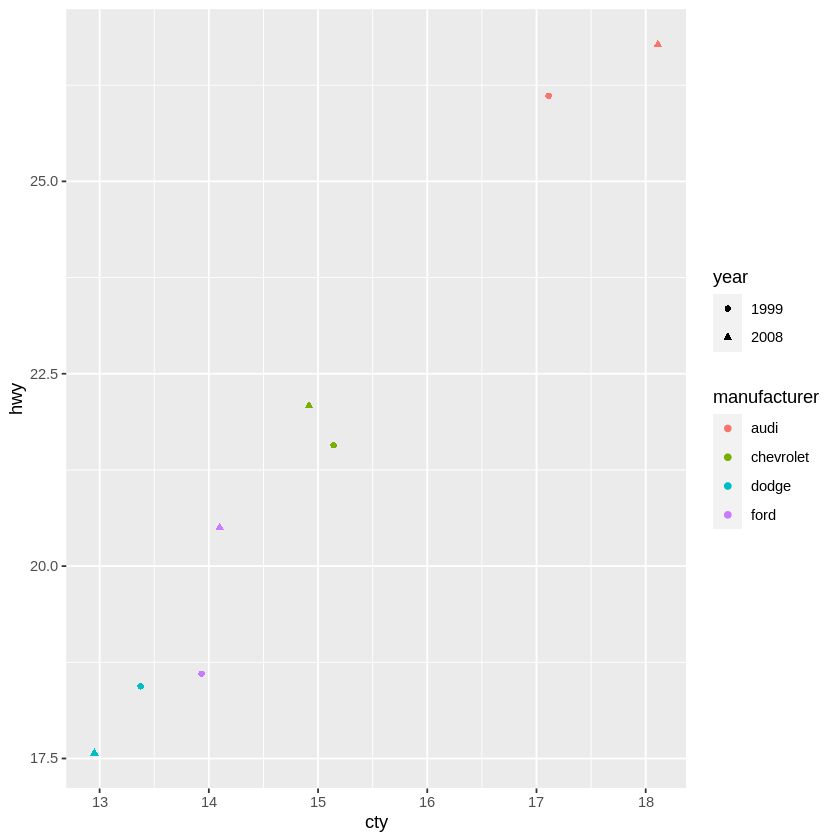

In [101]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
    geom_point(mapping = aes(color = manufacturer, shape = year))

## Pipes
The transformations above can be written as:


In [102]:
hwy_summary_ag2 = mpg2 %>% 
group_by(manufacturer, year) %>%
summarise(
    count = n(),
    hwy = mean(hwy, na.rm = TRUE),
    cty = mean(cty, na.rm = TRUE)) %>%
filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))

`summarise()` has grouped output by 'manufacturer'. You can override using the `.groups` argument.



In [103]:
hwy_summary_ag2

manufacturer,year,count,hwy,cty
<chr>,<fct>,<int>,<dbl>,<dbl>
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
